In [1]:
from detectron2.data import DatasetCatalog,MetadataCatalog
from plain_train_net import grab_dataset,OutputVis
import os
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
plt.style.use('ybpres.mplstyle')
import pandas as pd

In [2]:
dataset_name = "dfCERA_49vs97"
DatasetCatalog.register(dataset_name, grab_dataset(dataset_name))
MetadataCatalog.get(dataset_name).thing_classes = [""]
vis =OutputVis(dataset_name,pred_mode='file',pred_file = f'output_{dataset_name}/coco_instances_results.json',has_annotations=False)


In [3]:
dfpts = pd.read_csv(f'/data/amd-data/cera-rpd/detectron2-rpd/output_{dataset_name}/dfpts.csv')[['volID','dt_instances']]
dfimg = pd.read_csv(f'/data/amd-data/cera-rpd/detectron2-rpd/output_{dataset_name}/dfimg.csv',index_col=0)[['volID','scan']].reset_index()
dfdata = pd.read_parquet(f'/data/amd-data/cera-rpd/detectron2-rpd/datasets/{dataset_name}.parquet')
dfdata = dfdata[dfdata.fold=='CERA_49vs97'][['ptid','eye','totscans','volID','slicei']]
dfinstances = dfdata[['ptid','eye','totscans','volID']].drop_duplicates().merge(dfpts,on='volID')
dfdata = dfimg.merge(dfdata,left_on=['volID','scan'],right_on=['volID','slicei']).set_index('index').drop(columns=['slicei'])

In [4]:
dfinstances = dfinstances.assign(dt_instances_per_scan = (dfinstances.dt_instances/dfinstances.totscans.astype(int)))


In [18]:
threshA = .102
threshB = .204
dfinstances = dfinstances.assign(RPD_thresh_102 = dfinstances.dt_instances_per_scan>threshA)
dfinstances = dfinstances.assign(RPD_thresh_204 = dfinstances.dt_instances_per_scan>threshB)

In [47]:
dfinstances.sort_values(by='volID')
(dfinstances[dfinstances.totscans == '49']['dt_instances'].values)/(dfinstances[dfinstances.totscans == '97']['dt_instances'].values)
#(dfinstances[dfinstances.totscans == '97'][['volID','dt_instances']])

array([0.725     , 0.55978261, 0.88888889, 0.55555556, 0.71428571])

In [5]:
dfdata.volID.drop_duplicates()

index
PC_OS_49_043    PC_OS_49
PC_OS_97_002    PC_OS_97
PC_OD_97_073    PC_OD_97
PC_OD_49_029    PC_OD_49
PK_OS_49_002    PK_OS_49
PK_OS_97_056    PK_OS_97
PK_OD_49_005    PK_OD_49
PK_OD_97_013    PK_OD_97
JD_OD_49_015    JD_OD_49
JD_OD_97_070    JD_OD_97
Name: volID, dtype: object

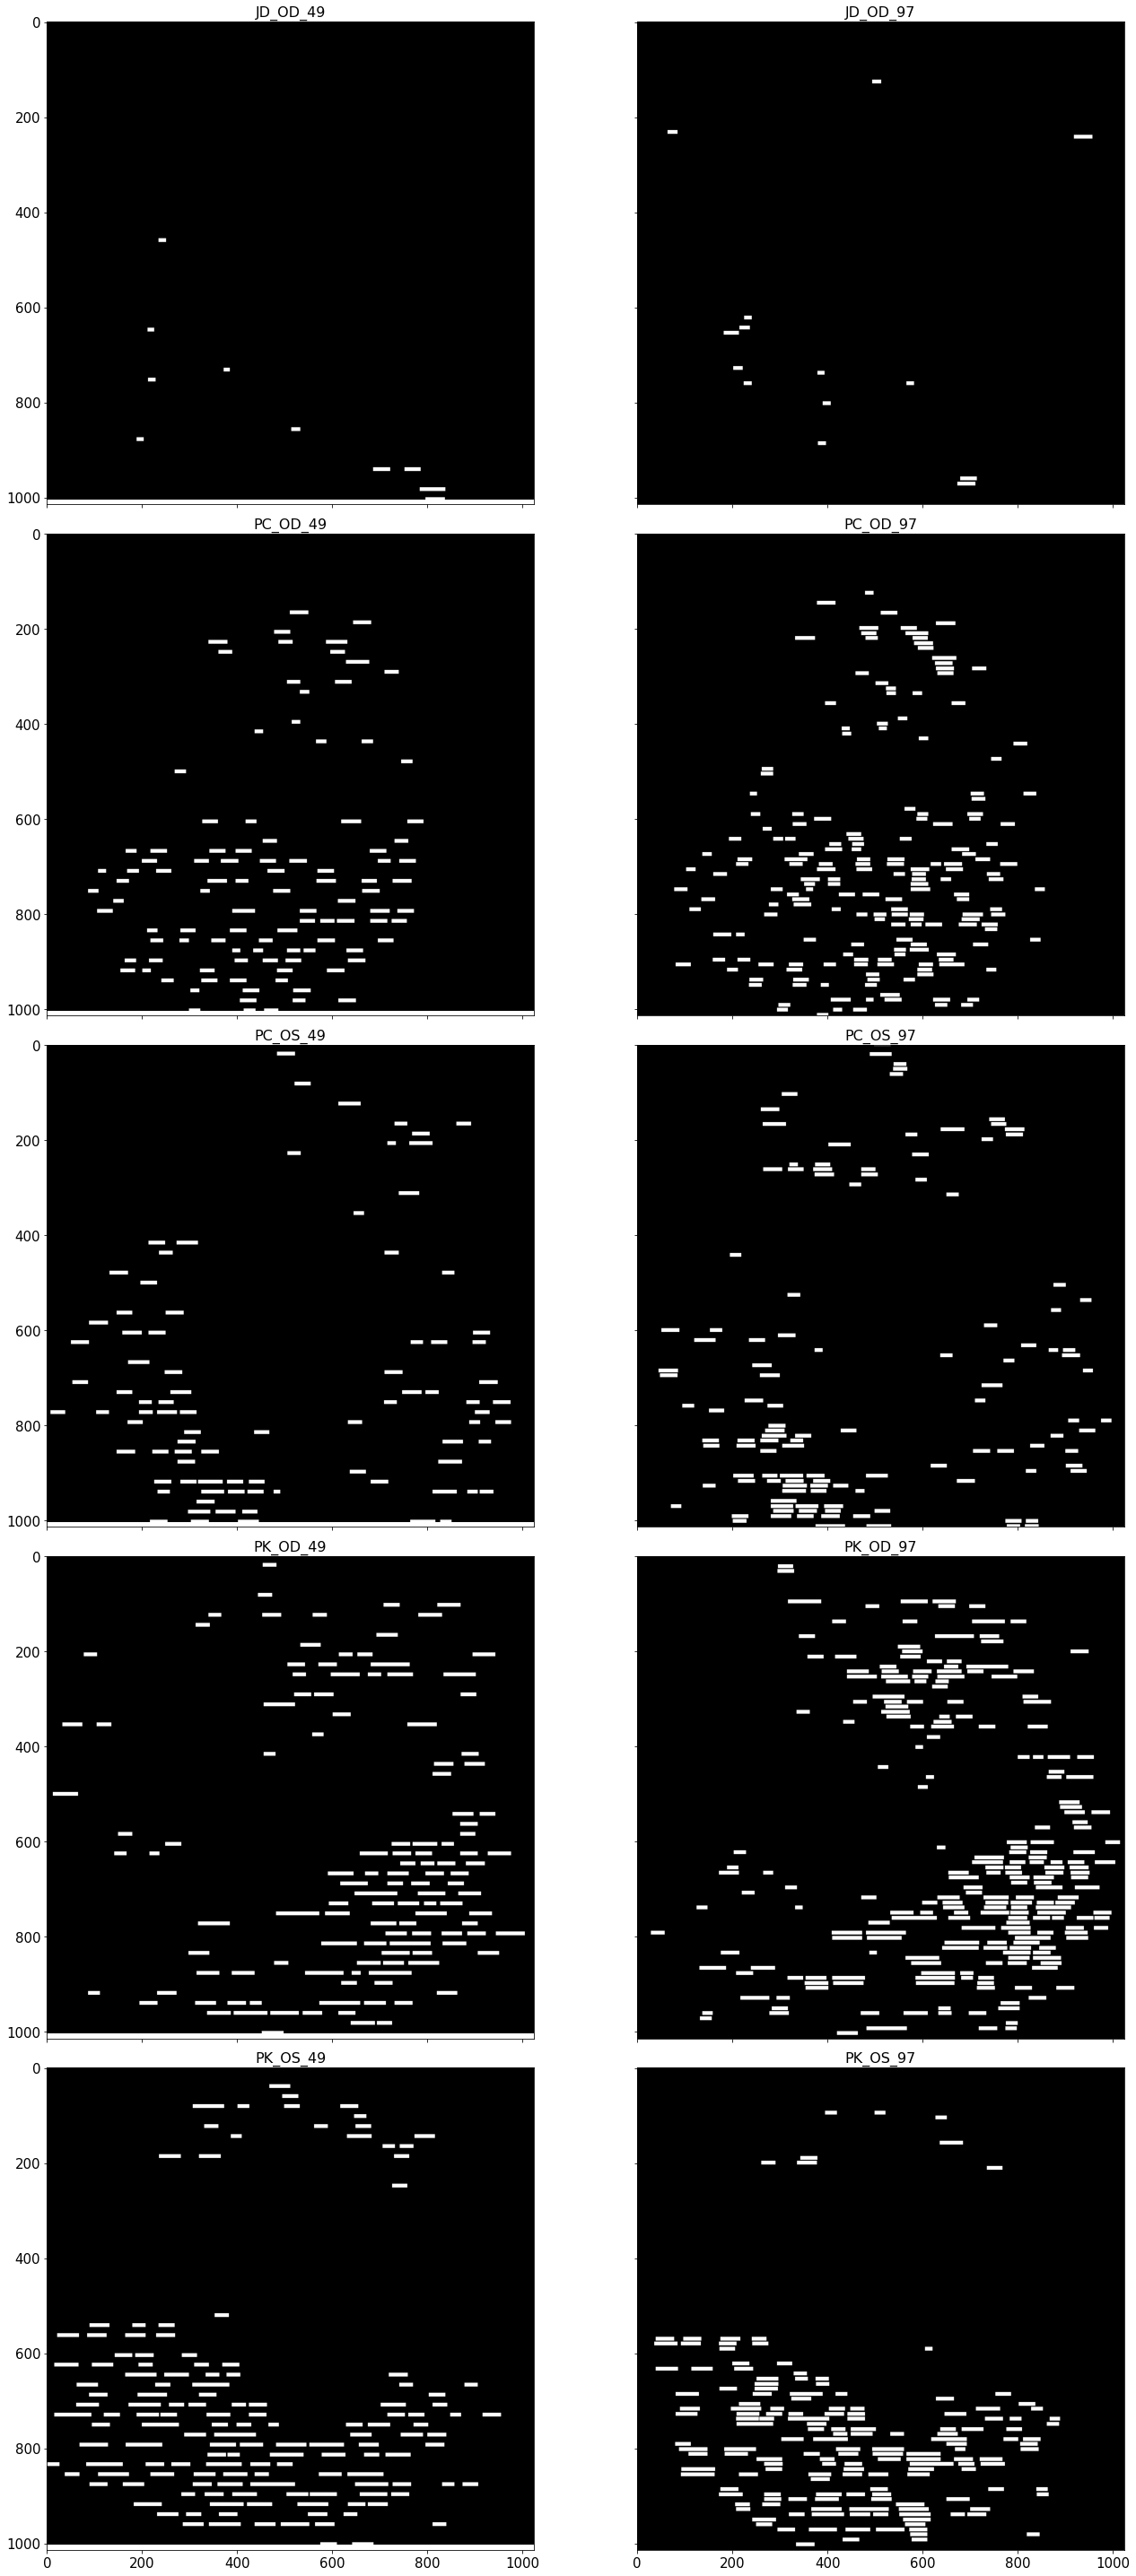

In [29]:
%matplotlib inline
fig,axs = plt.subplots(5,2,figsize=[20,40],sharex=True,sharey=True)
#fig.delaxes(fig.axes[-1]) #deletes the last set of unused axes (optional)
for (name,grp),ax in zip(dfdata.groupby('volID'),fig.axes):
    scan_spacing = grp.totscans.drop_duplicates().astype(int).values[0]
    im = vis.get_enface_dt(grp,496,1024,1024/scan_spacing)
    ax.imshow(im)
    ax.set_title(name)
plt.tight_layout()


In [ ]:
fig.savefig(f'output_{dataset_name}/49vs97_enface.png',dpi=200)

In [5]:
volid = 'PK_OD_49'
imgids = dfdata[dfdata.volID ==volid].index
vis.output_to_pdf(imgids.sort_values(), f'output_{dataset_name}/{volid}.pdf')

100%|██████████| 49/49 [00:54<00:00,  1.11s/it]
